---
# <font color="#FFA500"><strong>PROYECTO FINAL ESTADÍSTICA II</strong></font>
---


  <img src="https://drive.google.com/uc?export=view&id=1S8jkciWwQQJ6t-uLiNN0ublc8ZP1RJbg">

## <font color='#FFA500'> **Contenido**

[<font color='#FFA500'>**1. Introducción**</font>](#introduccion)

[<font color='#FFA500'>**2. Librerías y funciones**</font>](#libreriasyfunciones)

[<font color='#FFA500'>**3. Exploración del dataset**</font>](#exploracion)

[<font color='#FFA500'>**4. Pruebas de hipótesis**</font>](#hipotesis)

[<font color='#FFA500'>**5. Regresiones**</font>](#regresiones)

## <font color="#FFA500">**Introducción**</font>
<a name="introduccion">


El baloncesto, como uno de los deportes más dinámicos y analíticos del mundo, genera una vasta cantidad de datos que permiten evaluar el rendimiento individual y colectivo de los jugadores. En este proyecto, nos enfocamos en el análisis estadístico de las métricas clave de los jugadores de la NBA durante la temporada regular de 2023, utilizando el dataset 2023_nba_player_stats.csv, el cual, contiene estadísticas detalladas de 539 jugadores, con 30 variables que abarcan aspectos cuantitativos y cualitativos del rendimiento individual. A continuación, se describe su estructura y variables clave:

### <font color="#FFA500">**Variables del Dataset (NBA 2023)**</font>

#### <font color="#FFA500">1. Datos demográficos</font>

| **Variable** | **Descripción**                          | **Tipo**   |
|--------------|------------------------------------------|-------------|
| `PName`      | Nombre del jugador                       | `object`    |
| `POS`        | Posición (PG, SG, SF, PF, C)             | `object`    |
| `Team`       | Abreviatura del equipo                   | `object`    |
| `Age`        | Edad del jugador                         | `int64`     |

---

#### <font color="#FFA500">2. Rendimiento general</font>

| **Variable** | **Descripción**                          | **Tipo**   |
|--------------|------------------------------------------|-------------|
| `GP`         | Partidos jugados                         | `int64`     |
| `W`          | Partidos ganados                         | `int64`     |
| `L`          | Partidos perdidos                        | `int64`     |
| `Min`        | Minutos totales jugados                  | `float64`   |

---

#### <font color="#FFA500">3. Estadísticas ofensivas</font>

| **Variable** | **Descripción**                          | **Tipo**   |
|--------------|------------------------------------------|-------------|
| `PTS`        | Puntos totales anotados                  | `int64`     |
| `FGM`        | Tiros de campo convertidos               | `int64`     |
| `FGA`        | Tiros de campo intentados                | `int64`     |
| `FG%`        | Porcentaje de tiros de campo             | `float64`   |
| `3PM`        | Triples convertidos                      | `int64`     |
| `3PA`        | Triples intentados                       | `int64`     |
| `3P%`        | Porcentaje de triples                    | `float64`   |
| `FTM`        | Tiros libres convertidos                 | `int64`     |
| `FTA`        | Tiros libres intentados                  | `int64`     |
| `FT%`        | Porcentaje de tiros libres               | `float64`   |

---

#### <font color="#FFA500">4. Estadísticas defensivas</font>

| **Variable** | **Descripción**                          | **Tipo**   |
|--------------|------------------------------------------|-------------|
| `OREB`       | Rebotes ofensivos                        | `int64`     |
| `DREB`       | Rebotes defensivos                       | `int64`     |
| `REB`        | Rebotes totales                          | `int64`     |
| `STL`        | Robos de balón                           | `int64`     |
| `BLK`        | Bloqueos                                 | `int64`     |
| `PF`         | Faltas personales                        | `int64`     |
| `+/-`        | Diferencial de puntos del equipo         | `int64`     |

---

#### <font color="#FFA500">5. Métricas avanzadas</font>
| **Variable** | **Descripción**                          | **Tipo**   |
|--------------|------------------------------------------|-------------|
| `AST`        | Asistencias totales                      | `int64`     |
| `TOV`        | Pérdidas de balón                        | `int64`     |
| `FP`         | Puntos de fantasía NBA                   | `int64`     |
| `DD2`        | Número de dobles-dobles                  | `int64`     |
| `TD3`        | Número de triples-dobles                 | `int64`     |

---

**Notas**:  
- **Dataset**: [2023 NBA Player Stats](https://www.kaggle.com/datasets/amirhosseinmirzaie/nba-players-stats2023-season)  
- **Registros**: 539 jugadores  
- **Limpieza**:  
  - Relleno de valores vacíos en `POS` con "PF"  
  - Normalización de nombres de columnas  
  - Eliminamos jugadores con muy pocos minutos de juego


## <font color="#FFA500">**Librerías y funciones**</font>
<a name="libreriasyfunciones">

In [ ]:
#@title Librerías e imágenes utilizadas
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from scipy import stats
from PIL import Image

url1 = 'https://raw.githubusercontent.com/LauraCD2/estadisticos/refs/heads/main/Images/playoffs.png'
filename1 = 'playoffs.png'
response1 = requests.get(url1)
with open(filename1, 'wb') as f:
    f.write(response1.content)

url2 = 'https://raw.githubusercontent.com/LauraCD2/estadisticos/refs/heads/main/Images/llaves.png'
filename2 = 'llaves.png'
response2 = requests.get(url2)
with open(filename2, 'wb') as f:
    f.write(response2.content)

url3 = 'https://raw.githubusercontent.com/LauraCD2/estadisticos/refs/heads/main/Images/final.png'
filename3 = 'final.png'
response3 = requests.get(url3)
with open(filename3, 'wb') as f:
    f.write(response3.content)

In [ ]:
#@title Funciones utilizadas

#Una muestra, varianza conocida
def prueba_hipotesis_completa(x_barra, mu_0, sigma, n, alpha, cola, x_sup):
    Z = (x_barra - mu_0) / (sigma / np.sqrt(n))
    x = np.linspace(-20, 20, 1000)
    y = norm.pdf(x, 0, 1)


    if cola == 'inf':
      z = norm.ppf(alpha)
      if Z < z:
        print('Se rechaza Ho bajo', alpha)
      else:
        print('No se puede rechazar Ho bajo', alpha)

      print('punto crítico', z)

      p = norm.cdf(Z)
      print('p-valor:', p)

      beta = 1 - norm.cdf(z - (x_sup - mu_0)/(sigma/np.sqrt(n)))
      print('beta:', beta)

      cota_superior = x_barra + z * (sigma / np.sqrt(n))
      cota_inferior = x_barra - z * (sigma / np.sqrt(n))
      print('intervalo de confianza', cota_inferior, cota_superior)

      plt.fill_between(x, y, where=(x <= z), color='red')
      plt.axvline(z, color='black', linestyle='dotted')
      plt.axvline(Z, color='green', linestyle='--')


    if cola == 'sup':
      z = norm.ppf(1-alpha)
      if Z > z:
        print('Se rechaza Ho bajo', alpha)
      else:
        print('No se puede rechazar Ho bajo', alpha)

      print('punto crítico', z)

      p = 1 - norm.cdf(Z)
      print('p-valor', p)

      beta = norm.cdf(z - (x_sup - mu_0)/(sigma/np.sqrt(n)))
      print('beta', beta)

      cota_superior = x_barra + z * (sigma / np.sqrt(n))
      cota_inferior = x_barra - z * (sigma / np.sqrt(n))
      print('intervalo de confianza', cota_inferior, cota_superior)

      plt.fill_between(x, y, where=(x >= z), color='red', alpha=0.5)
      plt.axvline(z, color='black', linestyle='dotted')
      plt.axvline(Z, color='green', linestyle='--')

    if cola == 'dos':
      z_medio = norm.ppf(1 - alpha / 2)
      if abs(Z) > z_medio:
        print('Se rechaza Ho bajo', alpha)
      else:
        print('No se puede rechazar Ho bajo', alpha)

      print('puntos críticos', -z_medio, z_medio)

      p = 2 * (1 - norm.cdf(abs(Z)))
      print('p-valor', p)

      beta = norm.cdf(z_medio - (x_sup - mu_0)/(sigma/np.sqrt(n))) - norm.cdf(-z_medio - (x_sup - mu_0)/(sigma/np.sqrt(n)))
      print('beta', beta)

      cota_superior = x_barra + z_medio * (sigma / np.sqrt(n))
      cota_inferior = x_barra - z_medio * (sigma / np.sqrt(n))
      print('intervalo de confianza', cota_inferior, cota_superior)

      plt.fill_between(x, y, where=(x <= -z_medio), color='red', alpha=0.5)
      plt.fill_between(x, y, where=(x >= z_medio), color='red', alpha=0.5)
      plt.axvline(Z, color='green', linestyle='--')
      plt.axvline(-z_medio, color='black', linestyle='dotted')
      plt.axvline(z_medio, color='black', linestyle='dotted')
      plt.axvline(-z_medio, color='black', linestyle='dotted')
      plt.axvline(z_medio, color='black', linestyle='dotted')

    print('estadístico', Z)
    plt.show()

#Dos muestras, varianza conocida
def prueba_hipotesis_2muestrasZ(x_barra1, x_barra2, var1, var2, n1, n2, alpha, cola, delta=0):
    sigma = np.sqrt((var1 / n1) + (var2 / n2))
    Z = (x_barra1 - x_barra2 - delta) / sigma
    x = np.linspace(-10, 10, 1000)
    y = norm.pdf(x, 0, 1)

    if cola == 'inf':
        z = norm.ppf(alpha)
        if Z < z:
            print('Se rechaza Ho bajo', alpha)
        else:
            print('No se puede rechazar Ho bajo', alpha)

        print('Punto crítico:', z)

        p = norm.cdf(Z)
        print('p-valor:', p)

        cota_superior = (x_barra1 - x_barra2) + z * sigma
        cota_inferior = (x_barra1 - x_barra2) - z * sigma
        print('Intervalo de confianza:', cota_inferior, cota_superior)

        plt.fill_between(x, y, where=(x <= z), color='red', alpha=0.5)
        plt.axvline(z, color='black', linestyle='dotted')
        plt.axvline(Z, color='green', linestyle='--')

    elif cola == 'sup':
        z = norm.ppf(1 - alpha)
        if Z > z:
            print('Se rechaza Ho bajo', alpha)
        else:
            print('No se puede rechazar Ho bajo', alpha)

        print('Punto crítico:', z)

        p = 1 - norm.cdf(Z)
        print('p-valor:', p)

        cota_superior = (x_barra1 - x_barra2) + z * sigma
        cota_inferior = (x_barra1 - x_barra2) - z * sigma
        print('Intervalo de confianza:', cota_inferior, cota_superior)

        plt.fill_between(x, y, where=(x >= z), color='red', alpha=0.5)
        plt.axvline(z, color='black', linestyle='dotted')
        plt.axvline(Z, color='green', linestyle='--')

    elif cola == 'dos':
        z_medio = norm.ppf(1 - alpha / 2)
        if abs(Z) > z_medio:
            print('Se rechaza Ho bajo', alpha)
        else:
            print('No se puede rechazar Ho bajo', alpha)

        print('Puntos críticos:', -z_medio, z_medio)

        p = 2 * (1 - norm.cdf(abs(Z)))
        print('p-valor:', p)

        cota_superior = (x_barra1 - x_barra2) + z_medio * sigma
        cota_inferior = (x_barra1 - x_barra2) - z_medio * sigma
        print('Intervalo de confianza:', cota_inferior, cota_superior)

        plt.fill_between(x, y, where=(x <= -z_medio), color='red', alpha=0.5)
        plt.fill_between(x, y, where=(x >= z_medio), color='red', alpha=0.5)
        plt.axvline(Z, color='green', linestyle='--')
        plt.axvline(-z_medio, color='black', linestyle='dotted')
        plt.axvline(z_medio, color='black', linestyle='dotted')

    print('Estadístico:', Z)
    plt.show()

#Dos muestras, varianza desconocida
def prueba_hipotesis_2muestrasT(x_barra1, x_barra2, var1, var2, n1, n2, alpha, cola, delta=0, var='iguales'):
  if var == 'iguales':
    v = n1 + n2 -2
    Sp = np.sqrt(((n1 - 1)*var1 + (n2 - 1)*var2)/v)
    sigma = Sp*np.sqrt((1/n1) + (1/n2))
    print('varianza combinada', Sp**2, 'grados de libertad', v)
  if var == 'distinta':
    v = (var1/n1 + var2/n2)**2 / ((var1/n1)**2/(n1-1) + (var2/n2)**2/(n2-1))
    sigma = np.sqrt((var1/n1) + (var2/n2))
    print('grados de libertad', v)

  T = (x_barra1 - x_barra2 - delta) / sigma
  x = np.linspace(-10, 10, 1000)
  y = norm.pdf(x, 0, 1)

  if cola == 'inf':
    t = stats.t.ppf(alpha, v)
    if T < t:
      print('Se rechaza Ho bajo', alpha)
    else:
      print('No se puede rechazar Ho bajo', alpha)

    print('punto crítico:', t)

    p = norm.cdf(T)
    print('p-valor:', p)

    cota_superior = (x_barra1 - x_barra2) + t * sigma
    cota_inferior = (x_barra1 - x_barra2) - t * sigma
    print('Intervalo de confianza:', cota_inferior, cota_superior)

    plt.fill_between(x, y, where=(x <= t), color='red')
    plt.axvline(t, color='black', linestyle='dotted')
    plt.axvline(T, color='green', linestyle='--')

  if cola == 'sup':
    t = stats.t.ppf(1 - alpha, v)
    if T > t:
      print('Se rechaza Ho bajo', alpha)
    else:
      print('No se puede rechazar Ho bajo', alpha)

    print('punto crítico:', t)


    p_valor = 1 - norm.cdf(T)
    print('p-valor:', p_valor)

    cota_superior = (x_barra1 - x_barra2) + t * sigma
    cota_inferior = (x_barra1 - x_barra2) - t * sigma
    print('Intervalo de confianza:', cota_inferior, cota_superior)

    plt.fill_between(x, y, where=(x >= t), color='red', alpha=0.5)
    plt.axvline(t, color='black', linestyle='dotted')
    plt.axvline(T, color='green', linestyle='--')


  if cola == 'dos':
    t_medio = stats.t.ppf(1 - alpha / 2, v)
    if abs(T) > t_medio:
      print('Se rechaza Ho bajo', alpha)
    else:
      print('No se puede rechazar Ho bajo', alpha)

    print('puntos críticos', -t_medio, t_medio)

    p = 2 * (1 - norm.cdf(abs(T)))
    print('p-valor', p)

    cota_superior = (x_barra1 - x_barra2) + t_medio * sigma
    cota_inferior = (x_barra1 - x_barra2) - t_medio * sigma
    print('Intervalo de confianza:', cota_inferior, cota_superior)

    plt.fill_between(x, y, where=(x <= -t_medio), color='red', alpha=0.5)
    plt.fill_between(x, y, where=(x >= t_medio), color='red', alpha=0.5)
    plt.axvline(T, color='green', linestyle='--')
    plt.axvline(-t_medio, color='black', linestyle='dotted')
    plt.axvline(t_medio, color='black', linestyle='dotted')

  print('Estadístico:', T)
  plt.show()

#Regresion lineal
def regresion(x, y, alpha, z):
  # algunos valores
  n = np.size(x)
  sum_xy = np.sum(x * y)
  sum_x = np.sum(x)
  sum_y = np.sum(y)
  sum_x2 = np.sum(x ** 2)
  # print('sum_x2 es', sum_x2)
  x_barra = np.sum(x) / n
  # print('x_barra es', x_barra)
  y_barra = np.sum(y) / n
  SXY = sum_xy - (sum_y * sum(x)) / (n)
  SXX = sum_x2 - (sum_x ** 2) / (n)
  # print('SXY es', SXY)
  # print('SXX es', SXX)

  # coeficientes y recta
  B1 = SXY / SXX
  B0 = y_barra - B1 * x_barra
  y_estimados = B0 + B1 * x  # grafica
  print("Mi recta de regresion es", B0, '+', B1, 'x')
  print('B0 es', B0, 'y B1 es', B1)

  # Estimación sigma2
  SSE = np.sum(y**2) - B0*np.sum(y) - B1*np.sum(x*y)
  print('SSE es', SSE)
  sigma2 = SSE/(n-2)
  print('sigma2 es', sigma2)
  sigma = np.sqrt(sigma2)
  print('sigma es', sigma)

  #parámetros de B0, B1
  var_B1 = sigma2 / SXX
  print('var_B1 es', var_B1)
  var_B0 = (sigma2*sum(x**2)) / (n*SXX)
  print('var_B0 es', var_B0)
  std_B1 = np.sqrt(var_B1)
  print('std_B1 es', std_B1)
  std_B0 = np.sqrt(var_B0)
  print('std_B0 es', std_B0)
  cov_B1B0 = -(x_barra*sigma2)/(n*SXX)
  print('cov de B0 y B1 es', cov_B1B0)

  #intervalos de confianza
  v = n-2
  t_medio = stats.t.ppf(1-alpha/2, v)
  supB1 = B1 + t_medio*std_B1
  infB1 = B1 - t_medio*std_B1
  print('La cota superior para B1 es', supB1)
  print('La cota inferior para B1 es', infB1)
  y_estimadosSup = B0 + supB1*x
  y_estimadosInf = B0 + infB1*x

  #intervalo de predicción para Y
  y_estimado = B0 + B1*z
  print('y estimado para x = ',z,':', y_estimado)
  supY = y_estimado + t_medio*sigma*(np.sqrt(1 + 1/n + (z - x_barra)**2/SXX))
  infY = y_estimado - t_medio*sigma*(np.sqrt(1 + 1/n + (z - x_barra)**2/SXX))
  print('La cota superior para Y es', supY)
  print('La cota inferior para Y es', infY)


  #Correlacion
  SYY = np.sum((y - y_barra)**2)
  print("SYY:", SYY)
  r = SXY/np.sqrt(SXX*SYY)
  print("r es",r)

  return B0, B1, y_estimados, SSE, sigma2, sigma, SXX, var_B1, var_B0, std_B1, std_B0, cov_B1B0, supB1, infB1, y_estimadosSup, y_estimadosInf, y_estimado, supY, infY

#Regresion no lineal
def regresion_no_lineal(x, y, alpha, z, tipo):
  if tipo == 'Potencia':
    x = np.log(x)
    y = np.log(y)
    n = np.size(x)
    sum_xy = np.sum(x * y)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x2 = np.sum(x ** 2)
    # print('sum_x2 es', sum_x2)
    x_barra = np.sum(x) / n
    # print('x_barra es', x_barra)
    y_barra = np.sum(y) / n
    SXY = sum_xy - (sum_y * sum(x)) / (n)
    SXX = sum_x2 - (sum_x ** 2) / (n)
    # print('SXY es', SXY)
    # print('SXX es', SXX)

    # coeficientes y recta
    B1 = SXY / SXX
    B0 = y_barra - B1 * x_barra
    y_estimados = B0 + B1 * x  # grafica
    print("Mi recta de regresion es", B0, '+', B1, 'x')
    print('B0 es', B0, 'y B1 es', B1)

    y_estimado = np.exp(B0 + B1 * np.log(z))
    print('y estimado es', y_estimado)

  elif tipo == 'Exponencial':
    y = np.log(y)
    n = np.size(x)
    sum_xy = np.sum(x * y)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x2 = np.sum(x ** 2)
    # print('sum_x2 es', sum_x2)
    x_barra = np.sum(x) / n
    # print('x_barra es', x_barra)
    y_barra = np.sum(y) / n
    SXY = sum_xy - (sum_y * sum(x)) / (n)
    SXX = sum_x2 - (sum_x ** 2) / (n)
    # print('SXY es', SXY)
    # print('SXX es', SXX)

    # coeficientes y recta
    B1 = SXY / SXX
    B0 = y_barra - B1 * x_barra
    y_estimados = B0 + B1 * x  # grafica
    print("Mi recta de regresion es", B0, '+', B1, 'x')
    print('B0 es', B0, 'y B1 es', B1)

    y_estimado = np.exp(B0 + B1 * np.log(z))
    print('y estimado es', y_estimado)

  elif tipo == 'Logaritmica':
    x = np.log(x)
    n = np.size(x)
    sum_xy = np.sum(x * y)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x2 = np.sum(x ** 2)
    # print('sum_x2 es', sum_x2)
    x_barra = np.sum(x) / n
    # print('x_barra es', x_barra)
    y_barra = np.sum(y) / n
    SXY = sum_xy - (sum_y * sum(x)) / (n)
    SXX = sum_x2 - (sum_x ** 2) / (n)
    # print('SXY es', SXY)
    # print('SXX es', SXX)

    # coeficientes y recta
    B1 = SXY / SXX
    B0 = y_barra - B1 * x_barra
    y_estimados = B0 + B1 * x  # grafica
    print("Mi recta de regresion es", B0, '+', B1, 'x')
    print('B0 es', B0, 'y B1 es', B1)

    y_estimado = np.exp(B0 + B1 * np.log(z))
    print('y estimado es', y_estimado)

  elif tipo == 'Reciproca':
    x = 1/x
    n = np.size(x)
    sum_xy = np.sum(x * y)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x2 = np.sum(x ** 2)
    # print('sum_x2 es', sum_x2)
    x_barra = np.sum(x) / n
    # print('x_barra es', x_barra)
    y_barra = np.sum(y) / n
    SXY = sum_xy - (sum_y * sum(x)) / (n)
    SXX = sum_x2 - (sum_x ** 2) / (n)
    # print('SXY es', SXY)
    # print('SXX es', SXX)

    # coeficientes y recta
    B1 = SXY / SXX
    B0 = y_barra - B1 * x_barra
    y_estimados = B0 + B1 * x  # grafica
    print("Mi recta de regresion es", B0, '+', B1, 'x')
    print('B0 es', B0, 'y B1 es', B1)

    y_estimado = np.exp(B0 + B1 * np.log(z))
    print('y estimado es', y_estimado)

  return B0, B1, y_estimados, y_estimado

## <font color="#FFA500">**Exploración del dataset**</font>
<a name="exploracion">

In [ ]:
#@title Carga del dataset
df = pd.read_csv('https://raw.githubusercontent.com/LauraCD2/estadisticos/refs/heads/main/2023_nba_player_stats.csv')
df['POS'] = df['POS'].fillna('PF') #Limpiamos registros vacios.
df = df.iloc[:400]
print('Shape:',df.shape)
df.head(12)

Shape: (400, 30)


,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,...,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,...,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,...,569,529,236,90,33,166,3747,36,10,128
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,...,329,371,192,112,65,192,3425,3,0,149
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,...,742,359,246,52,51,197,3451,46,6,341
5,Anthony Edwards,SG,MIN,21,79,40,39,2841.5,1946,707,...,458,350,259,125,58,186,3311,9,0,97
6,Julius Randle,PF,NYK,28,77,44,33,2737.3,1936,658,...,767,316,216,49,21,233,3324,40,0,170
7,Donovan Mitchell,SG,CLE,26,68,44,24,2432.4,1922,679,...,289,301,180,99,27,168,2918,5,0,338
8,Trae Young,PG,ATL,24,73,38,35,2540.7,1914,597,...,217,741,300,80,9,104,3253,40,0,100
9,Zach LaVine,SG,CHI,28,77,38,39,2767.9,1913,673,...,345,327,194,69,18,159,2885,2,0,18


In [ ]:
#@title Tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PName   400 non-null    object 
 1   POS     400 non-null    object 
 2   Team    400 non-null    object 
 3   Age     400 non-null    int64  
 4   GP      400 non-null    int64  
 5   W       400 non-null    int64  
 6   L       400 non-null    int64  
 7   Min     400 non-null    float64
 8   PTS     400 non-null    int64  
 9   FGM     400 non-null    int64  
 10  FGA     400 non-null    int64  
 11  FG%     400 non-null    float64
 12  3PM     400 non-null    int64  
 13  3PA     400 non-null    int64  
 14  3P%     400 non-null    float64
 15  FTM     400 non-null    int64  
 16  FTA     400 non-null    int64  
 17  FT%     400 non-null    float64
 18  OREB    400 non-null    int64  
 19  DREB    400 non-null    int64  
 20  REB     400 non-null    int64  
 21  AST     400 non-null    int64  
 22  TO

<Axes: >

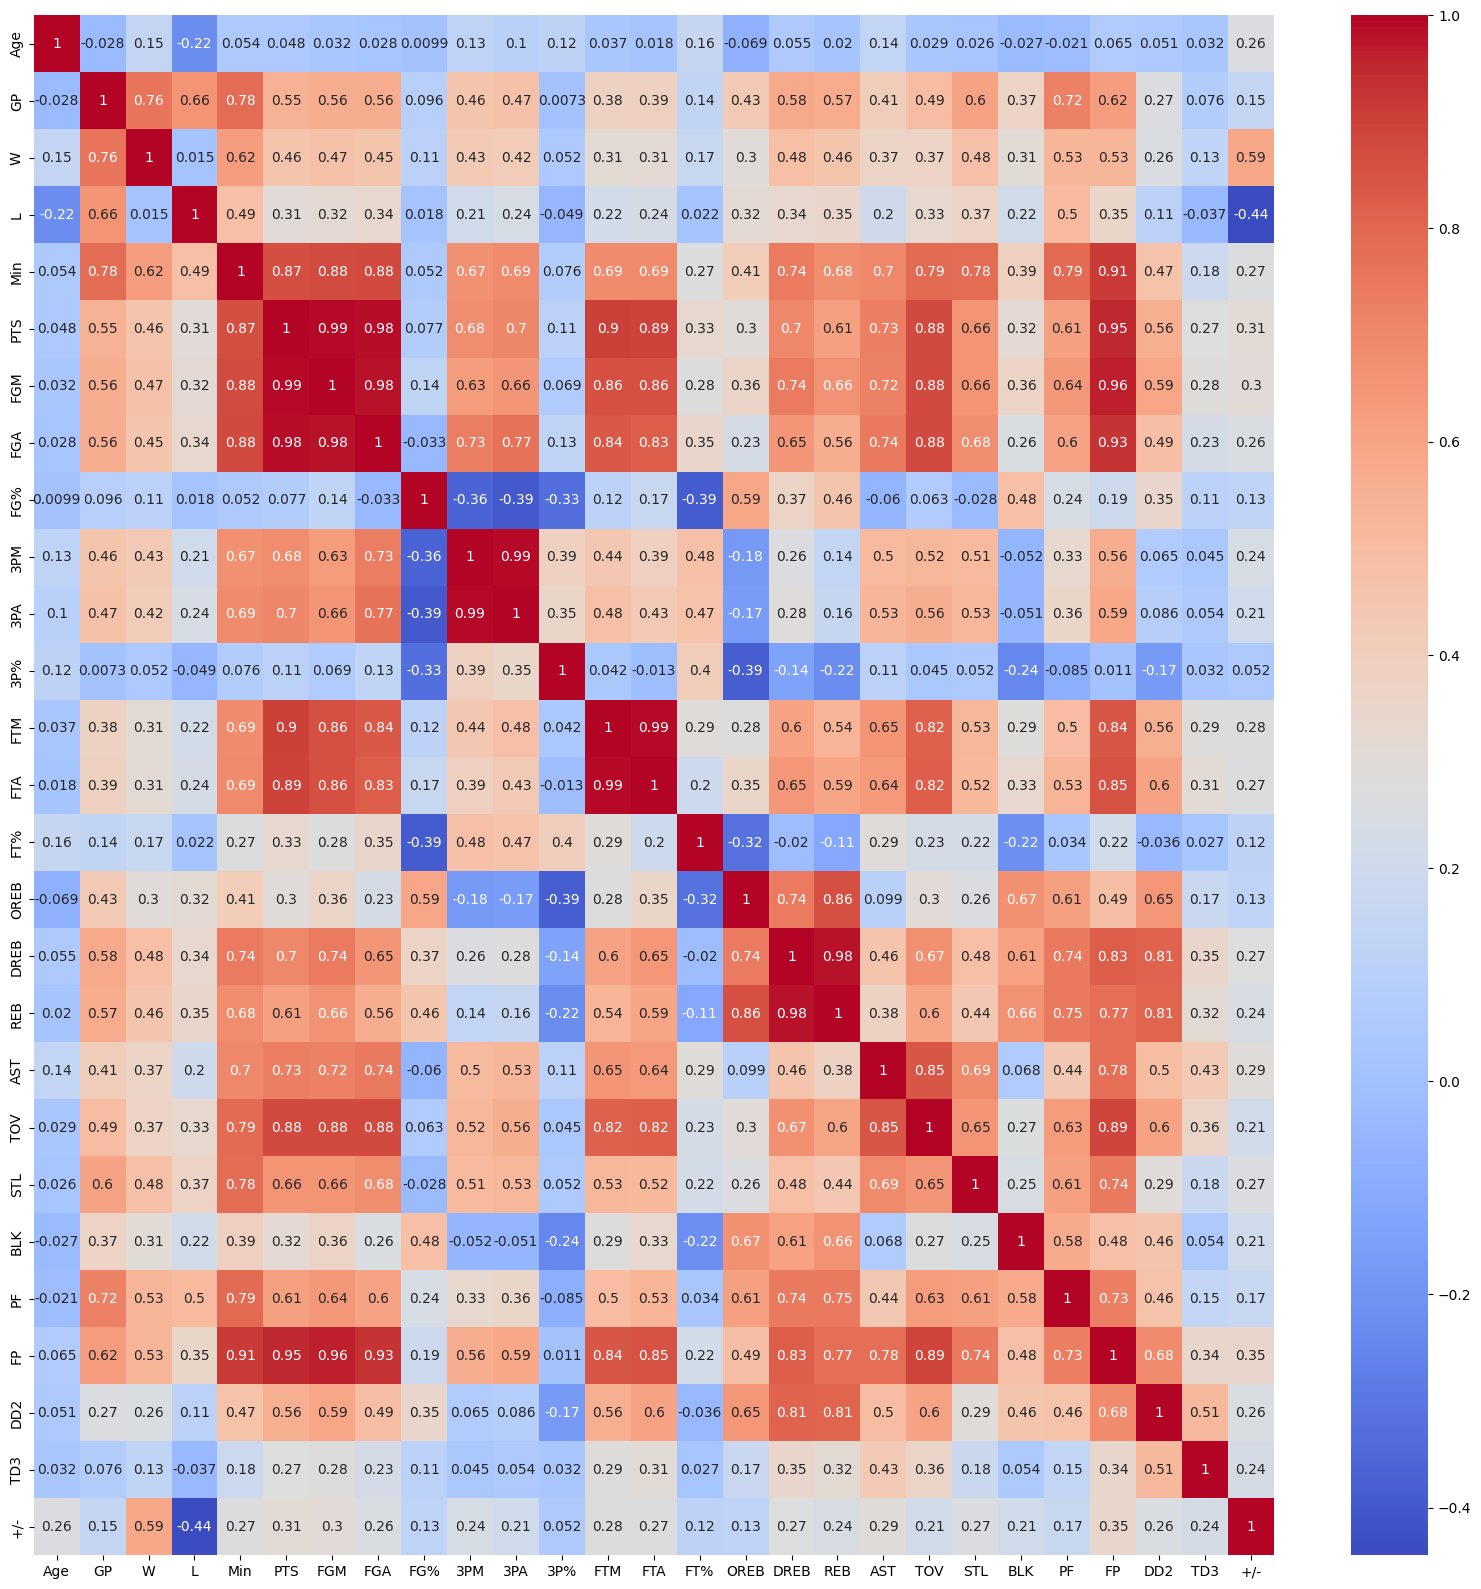

In [ ]:
#@title Matriz de correlación
corr_mat = df.iloc[:,3:].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm")

## <font color="#FFA500">**Pruebas de hipótesis**</font>
<a name="hipotesis">

###<font color="#FFA500">Prueba de hipotesis (una muestra)</font>

**¿Promedian los jugadores más de 20 puntos por partido?**

**Hipótesis nula ($H_o$):** μ  ≥ 20

**Hipótesis alternativa ($H_a$):** μ < 20

Se rechaza Ho bajo 0.05
punto crítico -1.6448536269514729
p-valor: 2.519838479606804e-251
beta: 1.0
intervalo de confianza 11.951136567182202 11.128709753706465
estadístico -33.84030735822267


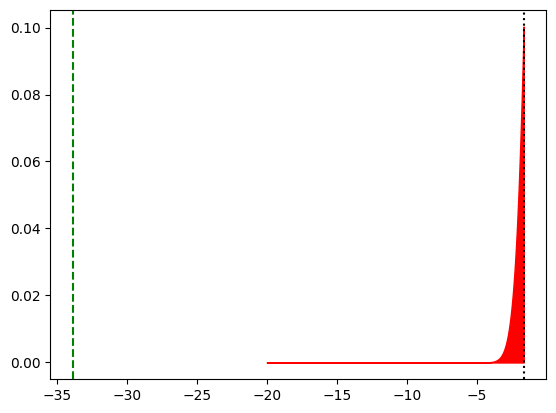

In [ ]:
#@title Con todos los jugadores del torneo
mu_0 = 20
x_barra = df['PTS'].sum() / df['GP'].sum()
sigma = 5
n = len(df)
prueba_hipotesis_completa(x_barra, mu_0, sigma, n, alpha=0.05, cola='inf', x_sup=22)

**Conclusión:** No hay suficiente evidencia para afirmar que los jugadores promedian más de 20 puntos por partido, esto se debe a que el conjunto de datos incluye jugadores de todos los roles, no solo estrellas o máximos anotadores.

No se puede rechazar Ho bajo 0.05
punto crítico -1.6448536269514729
p-valor: 1.0
beta: 1.0
intervalo de confianza 24.03752002694693 23.215093213471192
estadístico 14.505226480836242


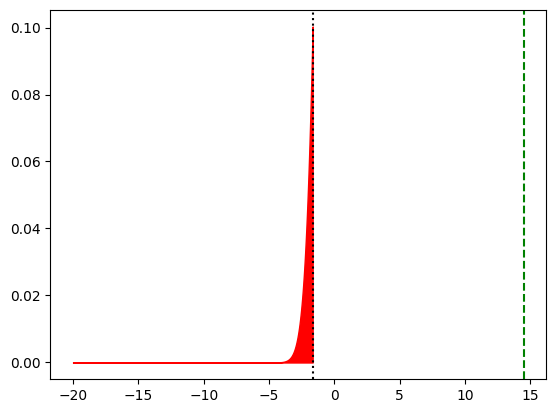

In [ ]:
#@title Con el top 50 jugadores del torneo
mejores50 = df.sort_values(by='PTS', ascending=False).head(50)
mu_0 = 20
x_barra = mejores50['PTS'].sum() / mejores50['GP'].sum()
sigma = 5
n = len(df)
prueba_hipotesis_completa(x_barra, mu_0, sigma, n, alpha=0.05, cola='inf', x_sup=22)

**Conclusión:** Hay suficiente evidencia para afirmar que los mejores 50 jugadores promedian más de 20 puntos por partido.

###<font color="#FFA500">Prueba de hipotesis (dos muestras)</font>

**¿Los centros (C) anotan en promedio más puntos por partido que los bases (PG)?**

**Hipótesis nula ($H_o$):** μ₁ − μ₂ ≥ 0 → Los centros anotan más que los bases.

**Hipótesis alternativa ($H_a$):** μ₁ − μ₂ < 0 → Los centros no anotan más que los bases.

Se rechaza Ho bajo 0.05
Punto crítico: -1.6448536269514729
p-valor: 0.009341331170445798
Intervalo de confianza: -0.8645208003614262 -4.887468009195331
Estadístico: -2.3518030847653466


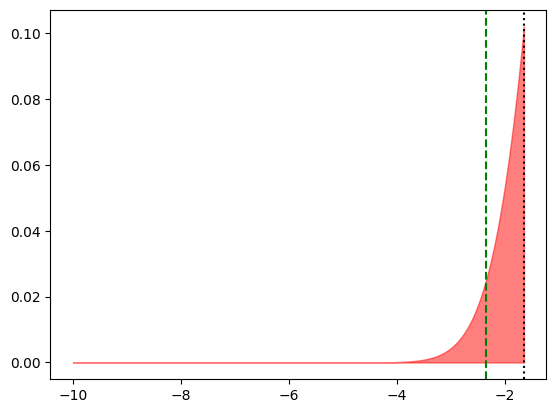

In [ ]:
#@title Realización de la prueba
C = df[df['POS'] == 'C']
PG = df[df['POS'] == 'PG']

x1 = C['PTS'].sum() / C['GP'].sum()
x2 = PG['PTS'].sum() / PG['GP'].sum()
var1 = np.var(C['PTS'] / C['GP'], ddof=0)
var2 = np.var(PG['PTS'] / PG['GP'], ddof=0)

prueba_hipotesis_2muestrasZ(x1, x2, var1, var2, len(C), len(PG), alpha=0.05, cola='inf')

**Conclusión:** No hay suficiente evidencia para afirmar que los escoltas (SG) anotan más puntos por partido que los bases (PG).
De hecho, el intervalo de confianza incluye valores negativos, lo que sugiere que en algunos casos los bases podrían incluso anotar más que los escoltas.

**¿Los jugadores de los Lakers son mayores que los de Oklahoma?**

**Hipótesis nula ($H_o$):** μ₁ − μ₂ ≥ 0 → Los Lakers son mayores

**Hipótesis alternativa ($H_a$):** μ₁ − μ₂ < 0 → Los de Oklahoma son mayores.

Se rechaza Ho bajo 0.05
Punto crítico: 1.6448536269514722
p-valor: 0.013186950965746513
Intervalo de confianza: 0.7992574032338586 5.365577761601302
Estadístico: 2.2206614264055813


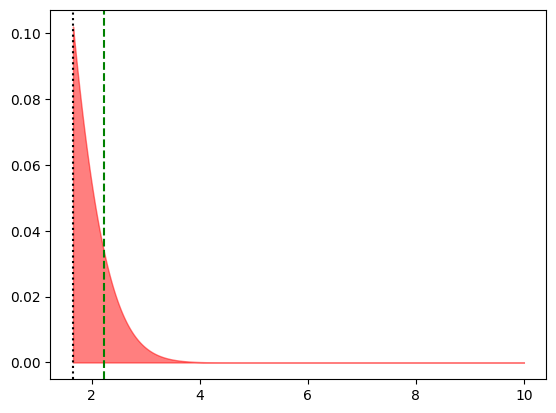

In [ ]:
#@title Realización de la prueba
Lakers = df[df['Team'] == 'LAL'][:15]
Oklahoma = df[df['Team'] == 'OKC'][:15]
x1 = np.mean(Lakers['Age'])
x2 = np.mean(Oklahoma['Age'])
var1 = np.var(Lakers['Age'], ddof=0)
var2 = np.var(Oklahoma['Age'], ddof=0)

prueba_hipotesis_2muestrasZ(x1, x2, var1, var2, len(Lakers), len(Oklahoma), alpha=0.05, cola='sup')

## <font color="#FFA500">**Regresiones**</font>
<a name="regresiones">

In [ ]:
#@title Variables
#@markdown Relación entre las variables $x$ (Minutos jugados) y $y$ (Puntos anotados)
x = df['Min'].astype(int)
print('Primeras 10 filas\n')
print('x=',np.array(x[:10]))
y = df['PTS'].astype(int)
print('\ny=',np.array(y[:10]))

Primeras 10 filas

x= [2732 2284 2390 2416 2023 2841 2737 2432 2540 2767]

y= [2225 2183 2138 2135 1959 1946 1936 1922 1914 1913]


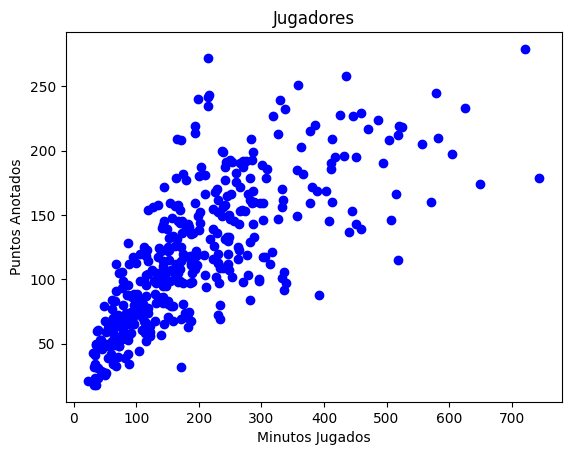

In [ ]:
#@title Gráfica de dispersión
plt.scatter(x, y, color='blue')
plt.title('Jugadores')
plt.xlabel('Minutos Jugados')
plt.ylabel('Puntos Anotados')
plt.show()

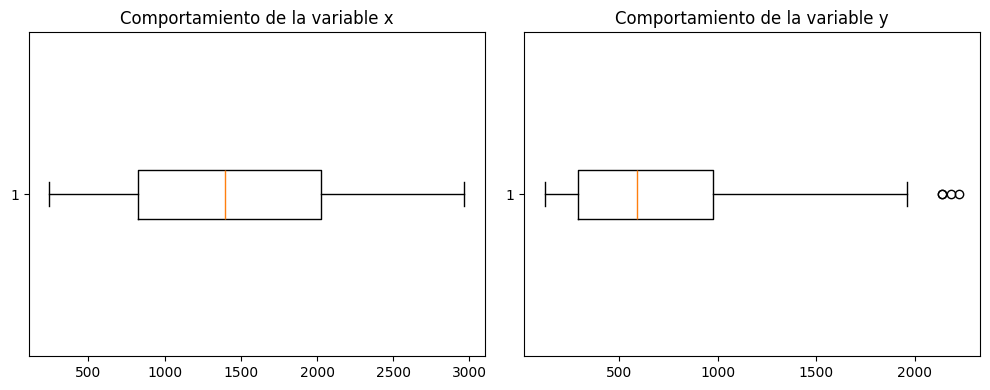

In [ ]:
#@title Comportamiento de las variables
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(x, vert=False)
plt.title('Comportamiento de la variable x')
plt.subplot(1, 2, 2)
plt.boxplot(y, vert=False)
plt.title('Comportamiento de la variable y')

plt.tight_layout()
plt.show()

In [ ]:
try:
  x = np.array(x)
  y = np.array(y)

  B0, B1, y_estimados, SSE, sigma2, sigma, SXX, var_B1, var_B0, std_B1, std_B0, cov_B1B0, supB1, infB1, y_estimadosSup, y_estimadosInf, y_estimado, supY, infY = regresion(x, y, 0.05, 2000)

except KeyError as e:
  print(f"Error: Column not found in DataFrame: {e}")
except Exception as e:
  print(f"Error processing data: {e}")

Mi recta de regresion es -171.56441116467204 + 0.5980886112118285 x
B0 es -171.56441116467204 y B1 es 0.5980886112118285
SSE es 22261574.649754286
sigma2 es 55933.60464762383
sigma es 236.50286393112418
var_B1 es 0.0002961301812799159
var_B0 es 755.5366685760317
std_B1 es 0.017208433434799227
std_B0 es 27.487027277900236
cov de B0 y B1 es -0.001067497480732373
La cota superior para B1 es 0.6319193988306273
La cota inferior para B1 es 0.5642578235930298
y estimado para x =  2000 : 1024.612811258985
La cota superior para Y es 1490.527314178197
La cota inferior para Y es 558.6983083397729
SYY: 89826484.43749999
r es 0.8672781383024645


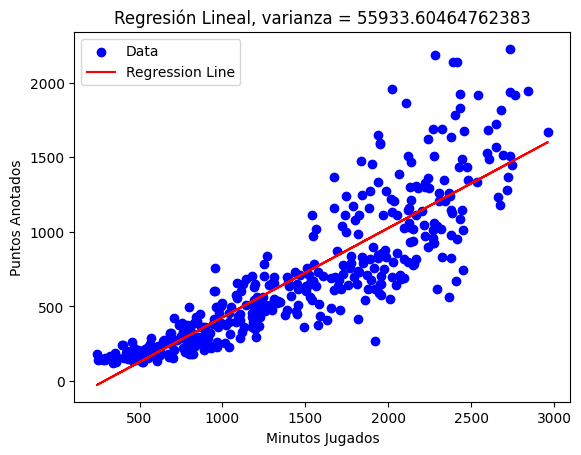

In [ ]:
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, y_estimados, color='red', label='Regression Line')
plt.xlabel('Minutos Jugados')
plt.ylabel('Puntos Anotados')
plt.title(f'Regresión Lineal, varianza = {sigma2}')
plt.legend()
plt.show()

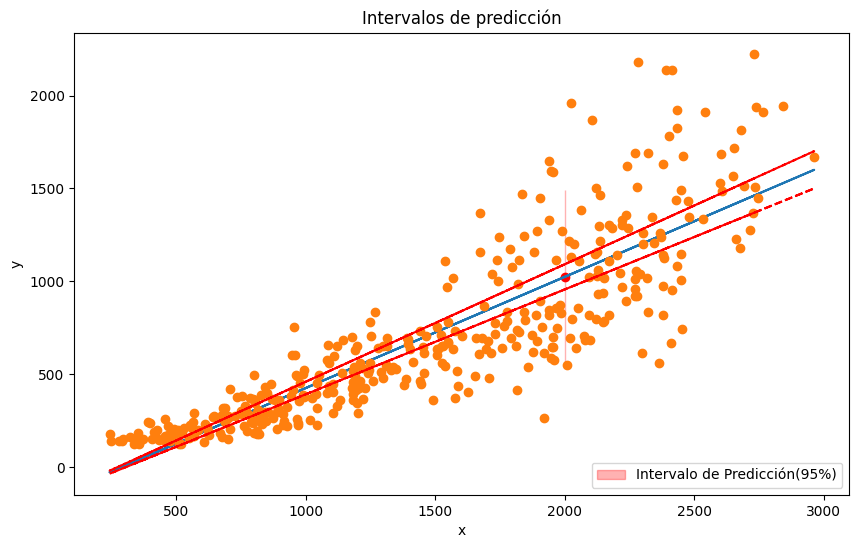

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x, y_estimados)
plt.plot(x, y, 'o')
plt.plot(x, y_estimadosSup, color='red', linestyle='--')
plt.plot(x, y_estimadosInf, color='red', linestyle='--')
plt.scatter(2000, y_estimado, color='red')
plt.fill_between(np.array([2000]), infY, supY, color='red', alpha=0.3, label='Intervalo de Predicción(95%)')
plt.legend(loc='lower right')
plt.title('Intervalos de predicción')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
#@title Variables
#@markdown Relación entre las variables $x$ (Bloqueos) y $y$ (Faltas personal)
x = df['DREB'].astype(int)
print('Primeras 10 filas\n')
print('x=',np.array(x[:10]))
y = df['PF'].astype(int)
print('\ny=',np.array(y[:10]))
x = np.array(x)
y = np.array(y)

Primeras 10 filas

x= [571 557 515 270 605 411 626 226 161 303]

y= [160 205 166 192 197 186 233 168 104 159]


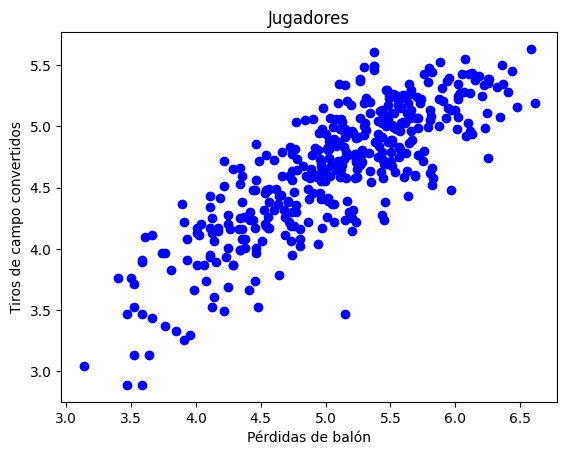

In [ ]:
#@title Gráfica de dispersión
plt.scatter(np.log(x), np.log(y), color='blue')
plt.title('Jugadores')
plt.xlabel('Pérdidas de balón')
plt.ylabel('Tiros de campo convertidos')
plt.show()

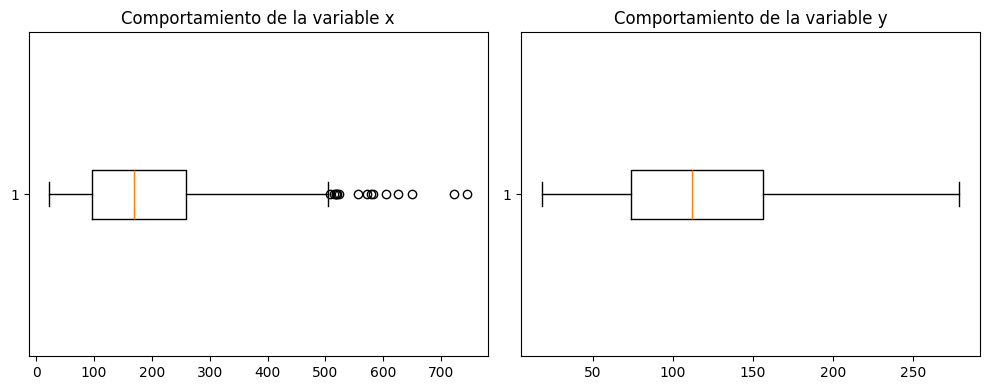

In [ ]:
#@title Comportamiento de las variables
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(x, vert=False)
plt.title('Comportamiento de la variable x')
plt.subplot(1, 2, 2)
plt.boxplot(y, vert=False)
plt.title('Comportamiento de la variable y')

plt.tight_layout()
plt.show()

In [ ]:
try:


  B0, B1, y_estimados, y_estimado =  regresion_no_lineal(x, y, 0.05, 4.5, 'Potencia')

except KeyError as e:
  print(f"Error: Column not found in DataFrame: {e}")
except Exception as e:
  print(f"Error processing data: {e}")

Mi recta de regresion es 1.4526512524547148 + 0.6308751887326804 x
B0 es 1.4526512524547148 y B1 es 0.6308751887326804
y estimado es 11.040125008455483


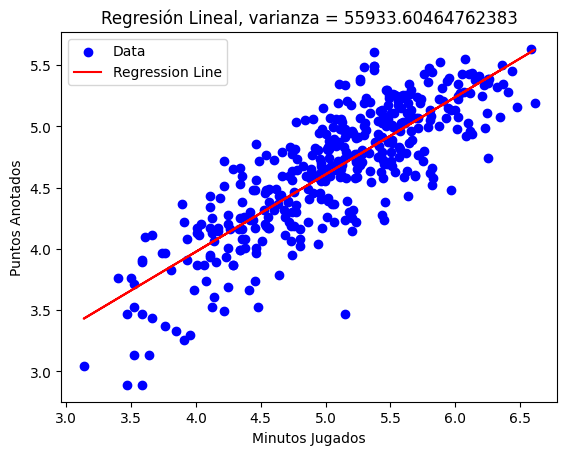

In [ ]:
plt.scatter(np.log(x), np.log(y), color='blue', label='Data')
plt.plot(np.log(x), y_estimados, color='red', label='Regression Line')
plt.xlabel('Minutos Jugados')
plt.ylabel('Puntos Anotados')
plt.title(f'Regresión Lineal, varianza = {sigma2}')
plt.legend()
plt.show()

In [ ]:
#@title Variables
#@markdown Relación entre las variables $x$ (Bloqueos) y $y$ (Faltas personal)
x = df['PTS'].astype(int)
print('Primeras 10 filas\n')
print('x=',np.array(x[:10]))
y = df['AST'].astype(int)
print('\ny=',np.array(y[:10]))

Primeras 10 filas

x= [2225 2183 2138 2135 1959 1946 1936 1922 1914 1913]

y= [342 274 529 371 359 350 316 301 741 327]


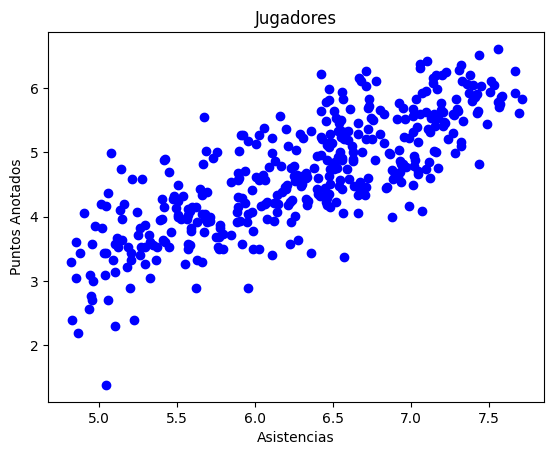

In [ ]:
#@title Gráfica de dispersión
plt.scatter(np.log(x), np.log(y), color='blue')
plt.title('Jugadores')
plt.xlabel('Asistencias')
plt.ylabel('Puntos Anotados')
plt.show()

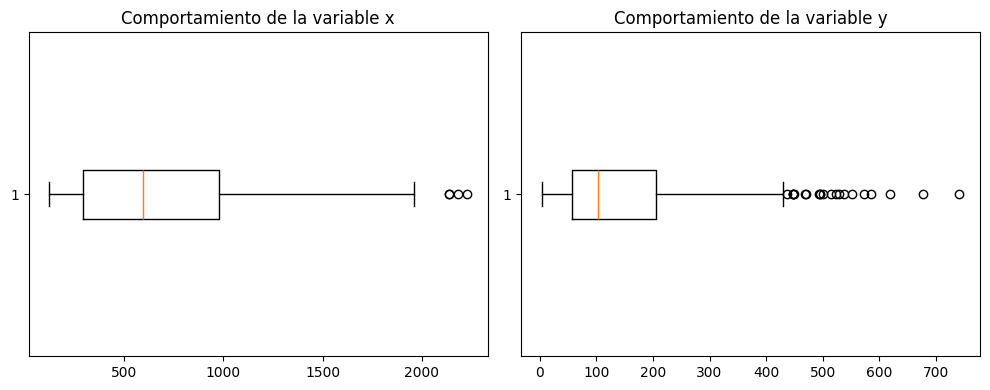

In [ ]:
#@title Comportamiento de las variables
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(x, vert=False)
plt.title('Comportamiento de la variable x')
plt.subplot(1, 2, 2)
plt.boxplot(y, vert=False)
plt.title('Comportamiento de la variable y')

plt.tight_layout()
plt.show()

In [ ]:
try:
  x = np.array(x)
  y = np.array(y)

  B0, B1, y_estimados, y_estimado =  regresion_no_lineal(x, y, 0.05, 4.5, 'Potencia')

except KeyError as e:
  print(f"Error: Column not found in DataFrame: {e}")
except Exception as e:
  print(f"Error processing data: {e}")

Mi recta de regresion es 1.4526512524547148 + 0.6308751887326804 x
B0 es 1.4526512524547148 y B1 es 0.6308751887326804
y estimado es 11.040125008455483


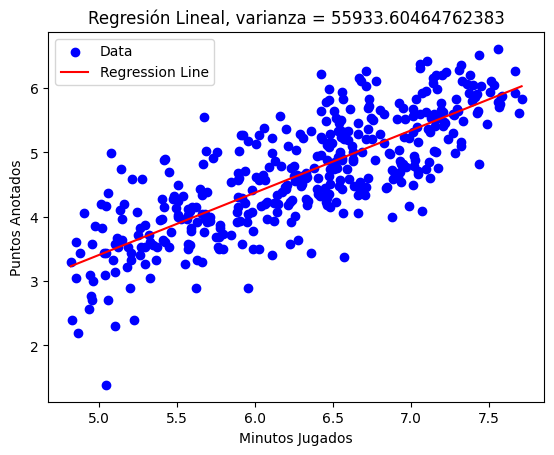

In [ ]:
plt.scatter(np.log(x), np.log(y), color='blue', label='Data')
plt.plot(np.log(x), y_estimados, color='red', label='Regression Line')
plt.xlabel('Minutos Jugados')
plt.ylabel('Puntos Anotados')
plt.title(f'Regresión Lineal, varianza = {sigma2}')
plt.legend()
plt.show()

##Teoremas celebres

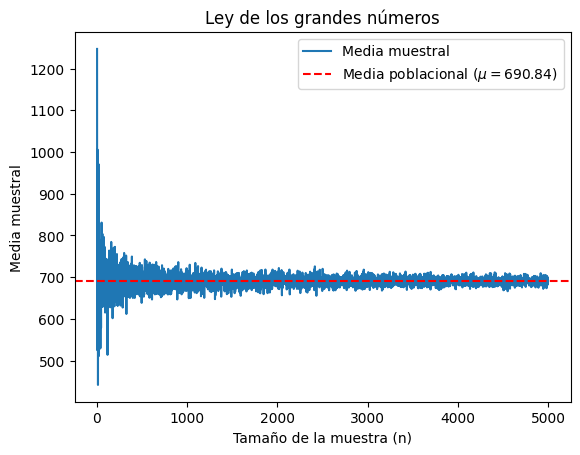

In [ ]:
#@title Ley de los grandes números (Puntos)
population_lgn = df['PTS'].astype(int)
population_lgn_mean = np.mean(population_lgn)
n_max = 5000
n_min = 1
means_lgn = np.empty(n_max - n_min)

for n in range(n_min, n_max):
  sample_lgn = np.random.choice(population_lgn, size=n, replace=True)
  means_lgn[n-n_min]= np.mean(sample_lgn)

plt.plot(range(n_min, n_max), means_lgn, label='Media muestral')
plt.axhline(population_lgn_mean, color='red', linestyle='--', label=f'Media poblacional ($\mu = {population_lgn_mean:.2f}$)')
plt.xlabel("Tamaño de la muestra (n)")
plt.ylabel("Media muestral")
plt.title("Ley de los grandes números")
plt.legend()
plt.show()

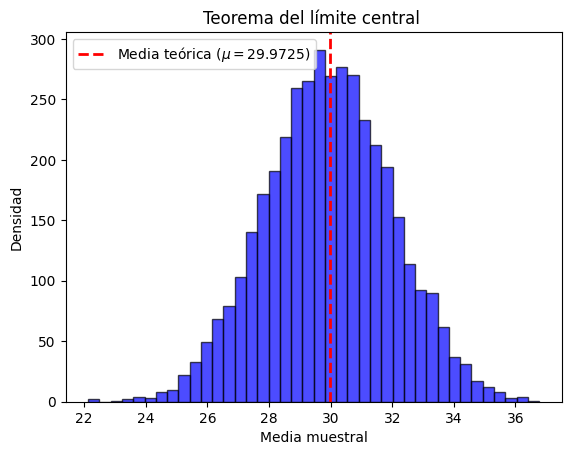

In [ ]:
#@title Teorema del límite central (victorias)
population_ctl = df['W'].astype(int)
mu_ctl = np.mean(population_ctl)

n = 30
num_experimentos = 4000

means_ctl = np.empty(num_experimentos)


for i in range(num_experimentos):
    sample_ctl = np.random.choice(population_ctl, size=n, replace=True)
    means_ctl[i] = np.mean(sample_ctl)

plt.hist(means_ctl, bins=40, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(mu_ctl, color='red', linestyle='dashed', linewidth=2, label=f'Media teórica ($\mu = {mu_ctl}$)')
plt.title('Teorema del límite central ')
plt.xlabel('Media muestral')
plt.ylabel('Densidad')
plt.legend()
plt.show()

In [ ]:
#@title Prueba de normalidad
from scipy.stats import shapiro

# Prueba de Shapiro-Wilk
stat, p = shapiro(means_ctl)
print('Estadístico=%.3f, p=%.3f' % (stat, p))

# Interpretación
if p > 0.05:
    print('Probablemente normal')
else:
    print('Probablemente no normal')

Estadístico=1.000, p=0.873
Probablemente normal


In [ ]:
#@title Prueba de hipótesis sobre $\beta1$
def pruebaHipotesis(x,B0,B1,std_B1,alpha):
  n = np.size(x)
  T = (B1 - 0)/(std_B1)
  print('T es', T)

  v = n-2
  t_medio = stats.t.ppf(1-alpha/2, v)
  print('el valor crítico es', t_medio)

  if abs(T)>t_medio:
    print('Se rechaza H0 bajo', alpha)
  else:
    print('No se rechaza H0 bajo', alpha)

In [ ]:
pruebaHipotesis(x,B0,B1,std_B1,0.05)

T es 50.2457252977857
el valor crítico es 1.964391426166216
Se rechaza H0 bajo 0.05


### Series de tiempo


In [ ]:
df['FN'] = 2023 - df['Age']
jugadores_por_año = df['FN'].value_counts().sort_index()

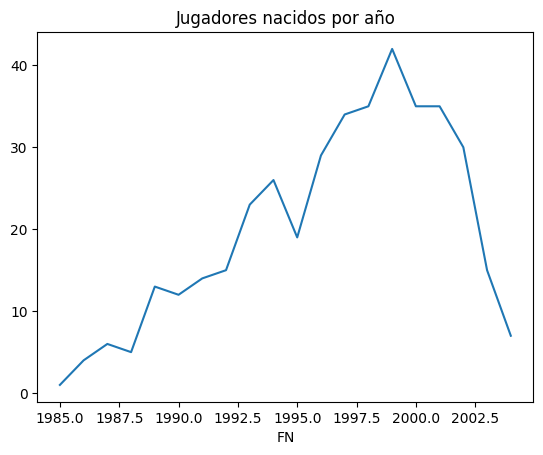

In [ ]:
jugadores_por_año.plot(kind='line', title='Jugadores nacidos por año')
plt.show()

In [ ]:
jugadores_por_año = pd.Series(jugadores_por_año.values, index=jugadores_por_año.index)

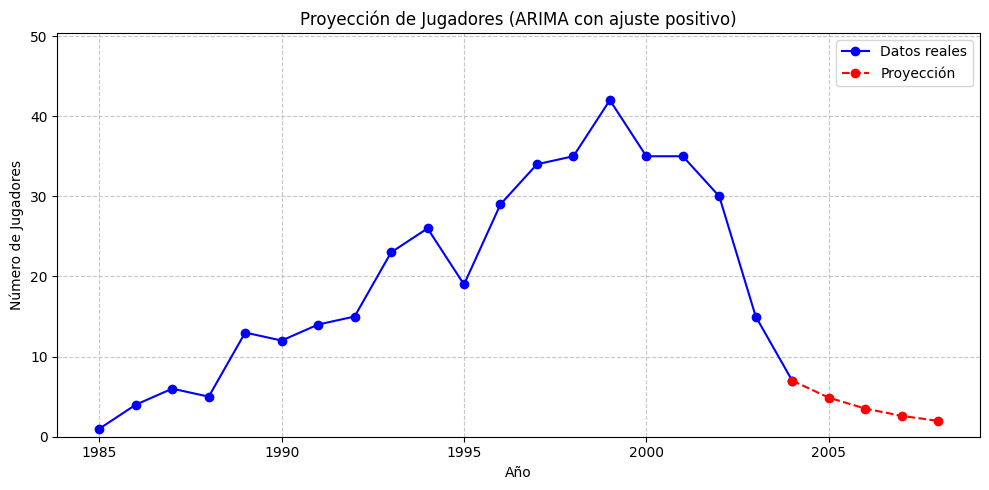

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

jugadores_log = np.log(jugadores_por_año)

modelo = ARIMA(jugadores_log, order=(1, 1, 1))
resultado = modelo.fit()

pred_log = resultado.get_forecast(steps=4)
pred = np.exp(pred_log.predicted_mean)

ultimo_punto = pd.Series([jugadores_por_año.iloc[-1]], index=[jugadores_por_año.index[-1]])

anios_conexion = [jugadores_por_año.index[-1]] + list(range(jugadores_por_año.index[-1] + 1, jugadores_por_año.index[-1] + 5))
valores_conexion = [jugadores_por_año.iloc[-1]] + list(pred)

plt.figure(figsize=(10, 5))
plt.plot(jugadores_por_año.index, jugadores_por_año.values, 'bo-', label='Datos reales')
plt.plot(anios_conexion, valores_conexion, 'ro--', label='Proyección')
plt.xlabel('Año')
plt.ylabel('Número de Jugadores')
plt.title('Proyección de Jugadores (ARIMA con ajuste positivo)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, max(jugadores_por_año.max(), pred.max()) * 1.2)
plt.tight_layout()
plt.show()

# PREDICCIÓN PLAYOFFS 2023

### ¿Qué son los Playoffs de la NBA?

Los *Playoffs* de la NBA es una competición que comienza una vez finalizada la temporada regular, en la cual los equipos que obtuvieron los mejores registros de victorias y derrotas de cada conferencia (Este y Oeste) compiten por el campeonato.

En total, **16** equipos clasifican a los Playoffs, 8 por la Conferencia Este y 8 por la Conferencia Oeste.

Una vez definidos los equipos clasificados, se enfrentan en una serie de eliminación directa al mejor de siete partidos.

Las rondas son:

1. Primera Ronda (o Cuartos de Final de Conferencia)  
2. Semifinales de Conferencia  
3. Finales de Conferencia  
4. Finales de la NBA

El primer equipo que gane 4 juegos en cada serie avanza a la siguiente ronda, y el último equipo en pie se corona como campeón de la NBA.


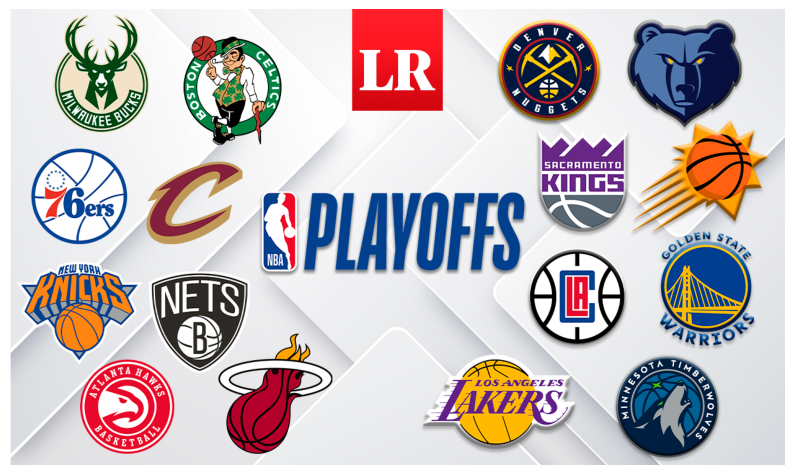

In [ ]:
#@title Equipos clasificados
img = Image.open('playoffs.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

### Objetivo (toca mejorar, solo puse la idea, falta parafraseada)

Mediante nuestro dataset, vamos a agrupar a los jugadores en los equipos que compitieron este torneo, y usaremos ciertas metricas para simular cada serie de dicho torneo, la intencion es comparar los resultados obtenidos, basados meramente en estadisticas de la temporada, con los resultados reales de los playoffs de ese año.

Con esto vemos si la dominancia de ciertos equipos mediante toda la temporada se vio reflejada en el torneo, además de que al ser un deporte, se creeria que no todo son las estadisticas, un equipo "peor" que otro puede dar la sorpresa y ganarle

### Equipos clasificados a los Playoffs 2023

\begin{array}{|c|l|l|}
\hline
\text{Puesto} & \text{Conferencia Este} & \text{Conferencia Oeste} \\
\hline
1 & \text{Milwaukee Bucks} & \text{Denver Nuggets} \\
2 & \text{Boston Celtics} & \text{Memphis Grizzlies} \\
3 & \text{Philadelphia 76ers} & \text{Sacramento Kings} \\
4 & \text{Cleveland Cavaliers} & \text{Phoenix Suns} \\
5 & \text{New York Knicks} & \text{Los Angeles Clippers} \\
6 & \text{Brooklyn Nets} & \text{Golden State Warriors} \\
7 & \text{Atlanta Hawks} & \text{Los Angeles Lakers} \\
8 & \text{Miami Heat} & \text{Minnesota Timberwolves} \\
\hline
\end{array}



In [ ]:
#@title Agrupando por equipos
#@markdown Escogemos los primeros 15 jugadores de cada equipo ya que eston son los que más minutos jugaron.

#Este
Bucks = df[df['Team'] == 'MIL'][:15]
Celtics = df[df['Team'] == 'BOS'][:15]
Sixers = df[df['Team'] == 'PHI'][:15]
Cavaliers = df[df['Team'] == 'CLE'][:15]
Knicks = df[df['Team'] == 'NYK'][:15]
Nets = df[df['Team'] == 'BKN'][:15]
Hawks = df[df['Team'] == 'ATL'][:15]
Heat = df[df['Team'] == 'MIA'][:15]

#Oeste
Nuggets = df[df['Team'] == 'DEN'][:15]
Grizzlies = df[df['Team'] == 'MEM'][:15]
Kings = df[df['Team'] == 'SAC'][:15]
Suns = df[df['Team'] == 'PHX'][:15]
Clippers = df[df['Team'] == 'LAC'][:15]
Warriors = df[df['Team'] == 'GSW'][:15]
Lakers = df[df['Team'] == 'LAL'][:15]
Timberwolves = df[df['Team'] == 'MIN'][:15]

#@markdown Ejemplo: Los Angeles Lakers
Lakers


,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
24,LeBron James,SF,LAL,38,55,30,25,1953.9,1590,609,...,457,375,178,50,32,88,2769,18,2,214
35,Anthony Davis,PF,LAL,30,56,31,25,1904.5,1451,542,...,702,148,122,59,114,146,2912,40,0,205
56,D'Angelo Russell,PG,LAL,27,71,39,32,2304.1,1263,445,...,215,437,186,70,29,140,2288,9,0,85
92,Malik Beasley,SG,LAL,26,81,45,36,2093.1,1025,370,...,283,124,90,65,9,107,1683,1,0,-87
118,Austin Reaves,SG,LAL,24,64,35,29,1843.2,833,259,...,193,215,99,33,19,108,1444,1,0,214
120,Dennis Schroder,PG,LAL,29,66,37,29,1985.9,830,270,...,165,298,112,50,10,145,1543,2,0,125
149,Rui Hachimura,PF,LAL,25,63,38,25,1466.0,707,284,...,283,58,53,19,26,72,1216,2,0,-28
173,Lonnie Walker IV,G,LAL,24,56,27,29,1297.0,654,236,...,109,64,46,30,17,71,976,0,0,-207
190,Jarred Vanderbilt,PF,LAL,24,78,43,35,1879.7,619,247,...,582,184,97,83,21,190,1808,10,0,-101
214,Troy Brown Jr.,SF,LAL,23,76,40,36,1859.8,541,200,...,308,95,49,59,16,120,1229,2,0,-15


### Sistema de puntuación
Para poder simular las series debemos asignar probabilidades, para esto cada equipo debe tener un puntaje del cual podamos basarnos, dicho puntaje se obtiene teniendo en cuenta lo siguiente para cada jugador:

-Puntos por partido

-Rebotes por partido

-Robos y bloqueos por partido

-Perdidas por partido (se restan)


Tomamos esos datos de cada jugador, le asignamos un peso diferente a cada uno y los sumamos, obteniendo un puntaje individual por jugador, despúes promediamos los puntajes de todos los jugadores y ese valor que obtenemos lo multiplicamos por la cantidad de victorias que tuvo el equipo a lo largo de la temporada, obteniendo asi el puntaje del equipo.


In [ ]:
def puntosEquipo(df):
  ventaja = df['W'].max()
  puntos = ((df['PTS'] / df['GP']) * df['FG%']) * 0.35 + (df['REB'] / df['GP']) * 0.2 + ((df['STL'] + df['BLK']) / df['GP']) * 0.3 - (df['TOV'] / df['GP']) * 0.15
  df['puntos_jugador'] = (
      puntos * (ventaja/100)
  )
  return df['puntos_jugador'].mean()

In [ ]:
#@title Puntos de cada equipo
#Este
puntos_bucks = puntosEquipo(Bucks)
puntos_celtics = puntosEquipo(Celtics)
puntos_sixers = puntosEquipo(Sixers)
puntos_cavaliers = puntosEquipo(Cavaliers)
puntos_knicks = puntosEquipo(Knicks)
puntos_nets = puntosEquipo(Nets)
puntos_hawks = puntosEquipo(Hawks)
puntos_heat = puntosEquipo(Heat)
#Oeste
puntos_nuggets = puntosEquipo(Nuggets)
puntos_grizzlies = puntosEquipo(Grizzlies)
puntos_kings = puntosEquipo(Kings)
puntos_suns = puntosEquipo(Suns)
puntos_clippers = puntosEquipo(Clippers)
puntos_warriors = puntosEquipo(Warriors)
puntos_lakers = puntosEquipo(Lakers)
puntos_timberwolves = puntosEquipo(Timberwolves)

print('Puntos del equipo Bucks:', puntos_bucks)
print('Puntos del equipo Celtics:', puntos_celtics)
print('Puntos del equipo 6ers:', puntos_sixers)
print('Puntos del equipo Cavaliers:', puntos_cavaliers)
print('Puntos del equipo Knicks:', puntos_knicks)
print('Puntos del equipo Nets:', puntos_nets)
print('Puntos del equipo Hawks:', puntos_hawks)
print('Puntos del equipo Heat:', puntos_heat)
print('Puntos del equipo Nuggets:', puntos_nuggets)
print('Puntos del equipo Grizzlies:', puntos_grizzlies)
print('Puntos del equipo Kings:', puntos_kings)
print('Puntos del equipo Suns:', puntos_suns)
print('Puntos del equipo Clippers:', puntos_clippers)
print('Puntos del equipo Warriors:', puntos_warriors)
print('Puntos del equipo Lakers:', puntos_lakers)
print('Puntos del equipo Timberwolves:', puntos_timberwolves)


Puntos del equipo Bucks: 100.90642182498028
Puntos del equipo Celtics: 96.75216199153621
Puntos del equipo 6ers: 92.54010335248253
Puntos del equipo Cavaliers: 77.3023157847564
Puntos del equipo Knicks: 80.13151944997352
Puntos del equipo Nets: 69.0397379669521
Puntos del equipo Hawks: 72.84448649174391
Puntos del equipo Heat: 71.66468552674272
Puntos del equipo Nuggets: 100.71891957633794
Puntos del equipo Grizzlies: 93.56400067833802
Puntos del equipo Kings: 75.7147629183116
Puntos del equipo Suns: 83.77211173746397
Puntos del equipo Clippers: 88.5247601366473
Puntos del equipo Warriors: 78.75069104262302
Puntos del equipo Lakers: 89.4089341204811
Puntos del equipo Timberwolves: 72.28166163007313


### Codigo de simulación

Hacemos la simulación de una serie, en la cual calculamos la probabilidad de que cada equipo gane, simulamos los juegos con un maximo de 7 y damos por ganador al primero que llegue a 4.

In [ ]:
def serie(equipo1, equipo2):
  ngames = 7
  wins1 = 0
  wins2 = 0
  puntos1 = puntosEquipo(equipo1)
  puntos2 = puntosEquipo(equipo2)
  prob1 = puntos1 / (puntos1 + puntos2)
  for i in range(ngames):
    # print('Juego', i+1, end=' :')
    if np.random.rand() < prob1:
      # print('Gana', equipo1['Team'].iloc[0])
      wins1 += 1
    else:
      # print('Gana', equipo2['Team'].iloc[0])
      wins2 += 1
    if wins1 == 4:
      eq1 = 1
      eq2 = 0
      break
    elif wins2 == 4:
      eq1 = 0
      eq2 = 1
      break
  # print(equipo1['Team'].iloc[0], wins1, '-', wins2, equipo2['Team'].iloc[0])
  return eq1, eq2, wins1, wins2

In [ ]:
#Ejemplo
serie(Bucks, Nuggets)

Juego 1 :Gana DEN
Juego 2 :Gana MIL
Juego 3 :Gana MIL
Juego 4 :Gana DEN
Juego 5 :Gana MIL
Juego 6 :Gana DEN
Juego 7 :Gana DEN
MIL 3 - 4 DEN


El codigo anterior nos retorna un ganador pero para solo una simulación, lo cual no es suficiente, por lo vamos a probar con 1001 simulaciones, número suficiente para definir un ganador, impar para que no puedan haber empates y tomar al equipo que más haya ganado.

In [ ]:
def simulacion(equipo1, equipo2, n=10001):
  victorias1 = 0
  victorias2 = 0
  for i in range(n):
    eq1, eq2, wins1, wins2 = serie(equipo1, equipo2)
    victorias1 += eq1
    victorias2 += eq2
  if victorias1 > victorias2:
    print('Gana', equipo1['Team'].iloc[0])
    if eq1 == 1:
      print(equipo1['Team'].iloc[0], wins1, '-', wins2, equipo2['Team'].iloc[0])
    else:
      print(equipo1['Team'].iloc[0], wins2, '-', wins1, equipo2['Team'].iloc[0])
    print('Victorias de', equipo1['Team'].iloc[0], ':', victorias1)
    print('Victorias de', equipo2['Team'].iloc[0], ':', victorias2)
    return equipo1
  elif victorias2 > victorias1:
    print('Gana', equipo2['Team'].iloc[0])
    if eq2 == 1:
      print(equipo1['Team'].iloc[0], wins1, '-', wins2, equipo2['Team'].iloc[0])
    else:
      print(equipo1['Team'].iloc[0], wins2, '-', wins1, equipo2['Team'].iloc[0])
    print('Victorias de', equipo1['Team'].iloc[0], ':', victorias1)
    print('Victorias de', equipo2['Team'].iloc[0], ':', victorias2)
    return equipo2

In [ ]:
#Ejemplo
simulacion(Bucks, Nuggets)

Gana DEN
DEN 4 - 2 MIL
Victorias de MIL : 463
Victorias de DEN : 538


### Simulación Playoffs

Ahora si podemos simular las rondas, para esto empezamos con la primera ronda para cada conferencia.


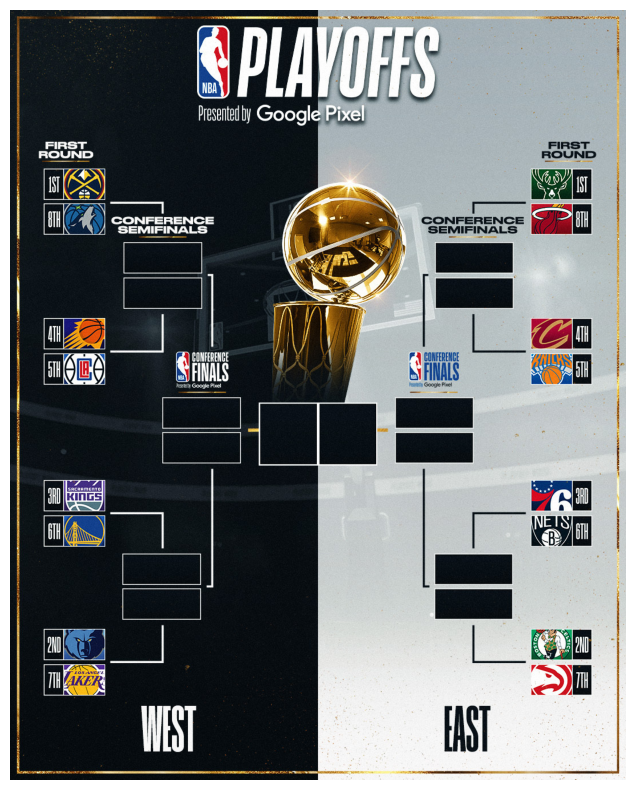

In [ ]:
#@title Llaves de primera ronda
img2 = Image.open('llaves.png')
plt.figure(figsize=(10, 10))
plt.imshow(img2)
plt.axis('off')
plt.show()

In [ ]:
#@title Este

print('MIL vs MIA')
Esemi1 = simulacion(Bucks, Heat)

print('\nCLE vs NYK')
Esemi2 = simulacion(Cavaliers, Knicks)

print('\nPHI vs BKN')
Esemi3 = simulacion(Sixers, Nets)

print('\nBOS vs ATL')
Esemi4 = simulacion(Celtics, Hawks)

MIL vs MIA
Gana MIL
MIL 4 - 2 MIA
Victorias de MIL : 6844
Victorias de MIA : 3157

CLE vs NYK
Gana NYK
CLE 0 - 4 NYK
Victorias de CLE : 4747
Victorias de NYK : 5254

PHI vs BKN
Gana PHI
PHI 4 - 3 BKN
Victorias de PHI : 6539
Victorias de BKN : 3462

BOS vs ATL
Gana BOS
BOS 4 - 2 ATL
Victorias de BOS : 6532
Victorias de ATL : 3469


In [ ]:
#@title Oeste

print('DEN vs MIN')
Wsemi1 = simulacion(Nuggets, Timberwolves)

print('\nPHX vs LAC')
Wsemi2 = simulacion(Suns, Clippers)

print('\nSAC vs GSW')
Wsemi3 = simulacion(Kings, Warriors)

print('\nMEM vs LAL')
Wsemi4 = simulacion(Grizzlies, Lakers)


DEN vs MIN
Gana DEN
DEN 4 - 2 MIN
Victorias de DEN : 6818
Victorias de MIN : 3183

PHX vs LAC
Gana LAC
PHX 3 - 4 LAC
Victorias de PHX : 4578
Victorias de LAC : 5423

SAC vs GSW
Gana GSW
SAC 1 - 4 GSW
Victorias de SAC : 4820
Victorias de GSW : 5181

MEM vs LAL
Gana MEM
MEM 4 - 1 LAL
Victorias de MEM : 5197
Victorias de LAL : 4804


### Semifinales de conferencia

In [ ]:
#@title Este

print(Esemi1['Team'].iloc[0],'vs', Esemi2['Team'].iloc[0])
Efinal1 = simulacion(Esemi1, Esemi2)
print('\n')
print(Esemi3['Team'].iloc[0],'vs', Esemi4['Team'].iloc[0])
Efinal2 = simulacion(Esemi3, Esemi4)

MIL vs NYK
Gana MIL
MIL 4 - 0 NYK
Victorias de MIL : 6245
Victorias de NYK : 3756


PHI vs BOS
Gana BOS
PHI 2 - 4 BOS
Victorias de PHI : 4740
Victorias de BOS : 5261


In [ ]:
#@title Oeste

print(Wsemi1['Team'].iloc[0],'vs', Wsemi2['Team'].iloc[0])
Wfinal1 = simulacion(Wsemi1, Wsemi2)
print('\n')
print(Wsemi3['Team'].iloc[0],'vs', Wsemi4['Team'].iloc[0])
Wfinal2 = simulacion(Wsemi3, Wsemi4)


DEN vs LAC
Gana DEN
DEN 4 - 3 LAC
Victorias de DEN : 5710
Victorias de LAC : 4291


GSW vs MEM
Gana MEM
GSW 3 - 4 MEM
Victorias de GSW : 4062
Victorias de MEM : 5939


### Finales de conferencia

In [ ]:
#@title Este

print(Efinal1['Team'].iloc[0],'vs', Efinal2['Team'].iloc[0])
Final1 = simulacion(Efinal1, Efinal2)


MIL vs BOS
Gana MIL
MIL 4 - 3 BOS
Victorias de MIL : 5162
Victorias de BOS : 4839


In [ ]:
#@title Oeste

print(Wfinal1['Team'].iloc[0],'vs', Wfinal2['Team'].iloc[0])
Final2 = simulacion(Wfinal1, Wfinal2)


DEN vs MEM
Gana DEN
DEN 4 - 1 MEM
Victorias de DEN : 5337
Victorias de MEM : 4664


### FINAL DE LA NBA

In [ ]:
print(Final1['Team'].iloc[0],'vs', Final2['Team'].iloc[0])
Final = simulacion(Final1, Final2)

MIL vs DEN
Gana MIL
MIL 4 - 0 DEN
Victorias de MIL : 5058
Victorias de DEN : 4943


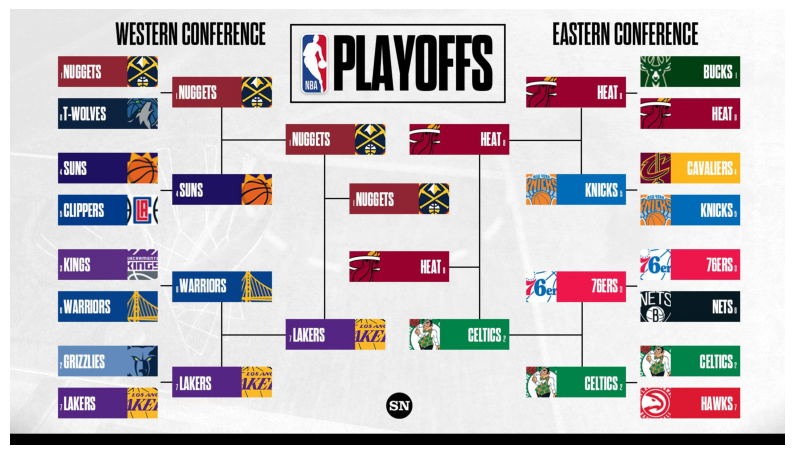

https://es.wikipedia.org/wiki/Temporada_2022-23_de_la_NBA


In [ ]:
#@title Playoffs 2023

img3 = Image.open('final.png')
plt.figure(figsize=(10, 10))
plt.imshow(img3)
plt.axis('off')
plt.show()

print('Más información sobre la temporada 2022-23 de la NBA en el siguiente enlace:')
print('https://es.wikipedia.org/wiki/Temporada_2022-23_de_la_NBA')